In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('letter-recognition.data')
df.isnull().sum()

T      0
2      0
8      0
3      0
5      0
1      0
8.1    0
13     0
0      0
6      0
6.1    0
10     0
8.2    0
0.1    0
8.3    0
0.2    0
8.4    0
dtype: int64

In [2]:
df.info

<bound method DataFrame.info of        T   2   8   3  5   1  8.1  13  0   6  6.1  10  8.2  0.1  8.3  0.2  8.4
0      I   5  12   3  7   2   10   5  5   4   13   3    9    2    8    4   10
1      D   4  11   6  8   6   10   6  2   6   10   3    7    3    7    3    9
2      N   7  11   6  6   3    5   9  4   6    4   4   10    6   10    2    8
3      G   2   1   3  1   1    8   6  6   6    6   5    9    1    7    5   10
4      S   4  11   5  8   3    8   8  6   9    5   6    6    0    8    9    7
5      B   4   2   5  4   4    8   7  6   6    7   6    6    2    8    7   10
6      A   1   1   3  2   1    8   2  2   2    8   2    8    1    6    2    7
7      J   2   2   4  4   2   10   6  2   6   12   4    8    1    6    1    7
8      M  11  15  13  9   7   13   2  6   2   12   1    9    8    1    1    8
9      X   3   9   5  7   4    8   7  3   8    5   6    8    2    8    6    7
10     O   6  13   4  7   4    6   7  6   3   10   7    9    5    9    5    8
11     G   4   9   6  7   6    7

In [3]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(["A", "B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z"])
list(le.classes_)
le.transform(df['T'])
y = le.transform(df['T'])
print(y)

[ 8  3 13 ..., 19 18  0]


In [4]:
X = np.array(df.iloc[:,1:17].astype(int))
print(X)

[[ 5 12  3 ...,  8  4 10]
 [ 4 11  6 ...,  7  3  9]
 [ 7 11  6 ..., 10  2  8]
 ..., 
 [ 6  9  6 ..., 12  2  4]
 [ 2  3  4 ...,  9  5  8]
 [ 4  9  6 ...,  7  2  8]]


In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.20, random_state=101)
print(y_train)

[12 19  2 ..., 22 10 13]


In [7]:
import numpy as np
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=26)
kmeans.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=26, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [8]:
from sklearn.metrics import accuracy_score
pred = kmeans.labels_
score = round(accuracy_score(pred,y_train),4)
print('Accuracy score using K-means clustering:',score)

Accuracy score using K-means clustering: 0.0209


In [9]:
import matplotlib.pyplot as plt
X_clustered = kmeans.fit_predict(X_scaled)
LABEL_COLOR_MAP = {0:'r', 1: 'g'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]
plt.figure(figsize = (7,7))
plt.scatter(X_scaled[:,0],X_scaled[:,1], c= label_color, alpha=0.5) 
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c="black",s=200, alpha=0.5)
plt.xlabel('radius_mean',fontsize=18)
plt.ylabel('texture_mean',fontsize=18)
plt.title('Breast_Cancer(K-means)',fontsize=20)
plt.show()

KeyError: 7

In [10]:
Sum_of_squared_distances = []
K = range(1,31)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_train)
    Sum_of_squared_distances.append(km.inertia_)

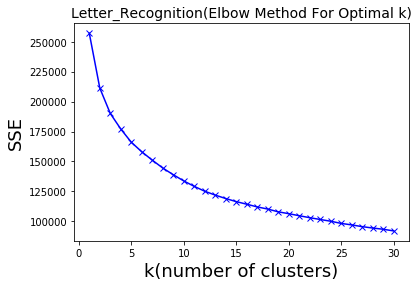

In [11]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k(number of clusters)',fontsize=18)
plt.ylabel('SSE',fontsize=18)
plt.title('Letter_Recognition(Elbow Method For Optimal k)',fontsize=14)
plt.show()

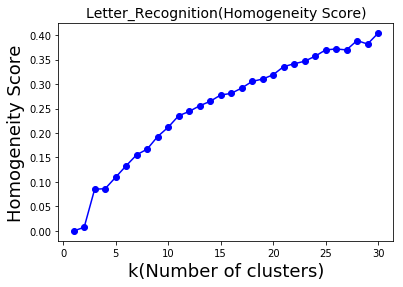

In [12]:
from sklearn import metrics
import matplotlib.pyplot as plt
homogeneity_scores=[]
clusters=range(1,31)
for k in clusters:
    km = KMeans(n_clusters=k)
    km = km.fit(X_train)
    lable = km.labels_
    homogeneity_scores.append(metrics.homogeneity_score(y_train,lable ))
plt.plot(clusters, homogeneity_scores,'bo-')
plt.xlabel('k(Number of clusters)',fontsize=18)
plt.ylabel('Homogeneity Score',fontsize=18)
plt.title('Letter_Recognition(Homogeneity Score)',fontsize=14)
plt.show()

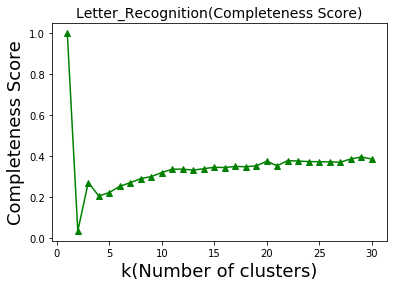

In [13]:
from sklearn import metrics
completeness_scores=[]
clusters=range(1,31)
for k in clusters:
    km = KMeans(n_clusters=k)
    km = km.fit(X_train)
    lable = km.labels_
    completeness_scores.append(metrics.completeness_score(y_train,lable ))
plt.plot(clusters, completeness_scores,'g^-')
plt.xlabel('k(Number of clusters)',fontsize=18)
plt.ylabel('Completeness Score',fontsize=18)
plt.title('Letter_Recognition(Completeness Score)',fontsize=14)
plt.show()

In [ ]:
#find optimized cluster number
meandist = []
ARI = []
AMI = []
h_score = []
c_score = []
V_measure = []
for k in range(1,11):
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10)
    Z = kmeans.fit_predict(X_train)
    # other scores
    ARI.append(metrics.adjusted_rand_score(y_train, Z))
    AMI.append(metrics.adjusted_mutual_info_score(y_train, Z))
    h, c, V = metrics.homogeneity_completeness_v_measure(y_train, Z)
    h_score.append(h)
    c_score.append(c)
    V_measure.append(V)

In [ ]:
k = [1,2,3,4,5,6,7,8,9,10]
plt.plot(k, ARI, color='red', label='adjusted_rand_score')
plt.plot(k, AMI, color='magenta', label='adjusted_mutual_score')
plt.plot(k, h_score, color='blue', label='homogeneity_score')
plt.plot(k, c_score, color='green', label='completeness_score')
plt.plot(k, V_measure, color='cyan', label='V-measure_score')

plt.legend(loc='upper right')
#plt.title("KNN: unweighted (Cancer)")
#plt.ylim(0.92, 1.01)
#plt.xticks(np.arange(0,2.1,0.5))
plt.xlabel('k(Number of clusters)',fontsize=18)
plt.ylabel('Score Values',fontsize=18);
plt.title('Letter_Recognition(Kmeans Performance)',fontsize=14)
plt.show()